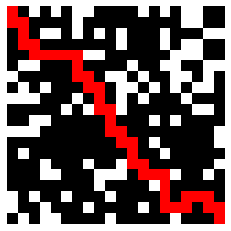

In [26]:
import random
import numpy as np
from typing import Literal
from code.maze import Maze

m = Maze()

def generate_maze(maze: np.ndarray, iter_num: int = 10) -> np.ndarray:
    incident_matrix = m.incident(maze)
    non_solvable = 0
    height, width = maze.shape
    while non_solvable < iter_num:
        num = random.randint(1, width**2 - 2)
        row = num // width
        column = num % width
        incident_row = row * width + column
        incident_matrix_row_copy = incident_matrix[incident_row, :].copy()
        incident_matrix_column_copy = incident_matrix[:, incident_row].copy()
        incident_matrix[incident_row, :] = 0
        incident_matrix[:, incident_row] = 0
        if row != 0 and not maze[row-1, column]:
            incident_column = (row - 1) * width + column
            incident_matrix[incident_row, incident_column] = 0
            incident_matrix[incident_column, incident_row] = 0
        if column != 0 and not maze[row, column-1]:
            incident_column = row * width + column - 1
            incident_matrix[incident_row, incident_column] = 0
            incident_matrix[incident_column, incident_row] = 0
        maze[row, column] = 1
        if not shortest_check(incident_matrix):
            non_solvable += 1
            incident_matrix[incident_row, :] = incident_matrix_row_copy
            incident_matrix[:, incident_row] = incident_matrix_column_copy
            maze[row, column] = 0
    return maze


def shortest_check_old(incident_matrix: np.ndarray, start_node: int = 0, end_node: int | None = None) -> bool:
    if end_node is None:
        end_node = incident_matrix.shape[0] - 1
    visited = [False] * incident_matrix.shape[0]
    visited[start_node] = True
    queue = [start_node]
    non_zero = [i for i, line in enumerate(incident_matrix) if np.any(line)]
    while queue:
        current = queue.pop(0)
        if current == end_node:
            return True
        for i in non_zero:
            if not visited[i] and incident_matrix[current, i]:
                visited[i] = True
                queue.append(i)
    return False

from collections import deque

def shortest_check(incident_matrix: np.ndarray, start_node: int = 0, end_node: int | None = None) -> bool:
    
    if end_node is None:
        end_node = incident_matrix.shape[0] - 1
    visited = [False] * incident_matrix.shape[0]
    visited[start_node] = True
    queue = deque([start_node])
    non_zero = [i for i, line in enumerate(incident_matrix) if np.any(line)]
    while queue:
        current = queue.popleft()
        if current == end_node:
            return True
        for i in non_zero:
            if not visited[i] and incident_matrix[current, i]:
                visited[i] = True
                queue.append(i)
    return False


maze = m.generate_temple(20, mode="empty")
maze = generate_maze(maze, iter_num=20)
incident_matrix = m.incident(maze)
path = m.find_shortest_path(incident_matrix)
maze = m.add_path_to_maze(maze, path)
m.plot_maze(maze)

In [29]:
n = 20
maze = m.generate_temple(n, mode="empty")
numbers = np.random.randint(0, n**2, (n**2)+1000)

def generate_maze_test(maze: np.ndarray, numbers: np.ndarray, iter_num: int = 10) -> np.ndarray:
    incident_matrix = m.incident(maze)
    non_solvable = 0
    height, width = maze.shape
    i = 0
    while non_solvable < iter_num:
        num = numbers[i]
        row = num // width
        column = num % width
        incident_row = row * width + column
        incident_matrix_row_copy = incident_matrix[incident_row, :].copy()
        incident_matrix_column_copy = incident_matrix[:, incident_row].copy()
        incident_matrix[incident_row, :] = 0
        incident_matrix[:, incident_row] = 0
        if row != 0 and not maze[row-1, column]:
            incident_column = (row - 1) * width + column
            incident_matrix[incident_row, incident_column] = 0
            incident_matrix[incident_column, incident_row] = 0
        if column != 0 and not maze[row, column-1]:
            incident_column = row * width + column - 1
            incident_matrix[incident_row, incident_column] = 0
            incident_matrix[incident_column, incident_row] = 0
        maze[row, column] = 1
        if not shortest_check(incident_matrix):
            non_solvable += 1
            incident_matrix[incident_row, :] = incident_matrix_row_copy
            incident_matrix[:, incident_row] = incident_matrix_column_copy
            maze[row, column] = 0
        i += 1
    return maze


def generate_maze_test_slower(maze: np.ndarray, numbers, iter_num: int = 10) -> np.ndarray:
    incident_matrix = m.incident(maze)
    non_solvable = 0
    height, width = maze.shape
    i = 0
    while non_solvable < iter_num:
        num = numbers[i]
        row = num // width
        column = num % width
        incident_row = row * width + column
        incident_matrix_row_copy = incident_matrix[incident_row, :].copy()
        incident_matrix_column_copy = incident_matrix[:, incident_row].copy()
        incident_matrix[incident_row, :] = 0
        incident_matrix[:, incident_row] = 0
        if row != 0 and not maze[row-1, column]:
            incident_column = (row - 1) * width + column
            incident_matrix[incident_row, incident_column] = 0
            incident_matrix[incident_column, incident_row] = 0
        if column != 0 and not maze[row, column-1]:
            incident_column = row * width + column - 1
            incident_matrix[incident_row, incident_column] = 0
            incident_matrix[incident_column, incident_row] = 0
        maze[row, column] = 1
        if not shortest_check_old(incident_matrix):
            non_solvable += 1
            incident_matrix[incident_row, :] = incident_matrix_row_copy
            incident_matrix[:, incident_row] = incident_matrix_column_copy
            maze[row, column] = 0
        i += 1
    return maze

In [31]:

%timeit generate_maze_test(maze,numbers, 30)
%timeit generate_maze_test_slower(maze,numbers, 30)

1.39 s ± 215 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.25 s ± 53.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
